In [2]:
import pandas as pd
import numpy as np
from statistics import mean

In [3]:
path = '/home/deep/Workspace/Outlet1.csv'
data = pd.read_csv(path, header=0, names=['DateTime', 'Gurgaon-MCU-Power'], date_parser=True)
date = data['DateTime'].values
mcu = data['Gurgaon-MCU-Power'].values

In [4]:
data['DateTime'] = pd.to_datetime(data['DateTime'], errors='coerce')

In [5]:
data.index = pd.to_datetime(data['DateTime'], unit='s')
data.index

DatetimeIndex(['2015-09-15 00:00:00', '2015-09-15 00:01:00',
               '2015-09-15 00:02:00', '2015-09-15 00:03:00',
               '2015-09-15 00:04:00', '2015-09-15 00:05:00',
               '2015-09-15 00:06:00', '2015-09-15 00:07:00',
               '2015-09-15 00:08:00', '2015-09-15 00:09:00',
               ...
               '2015-10-31 23:50:00', '2015-10-31 23:51:00',
               '2015-10-31 23:52:00', '2015-10-31 23:53:00',
               '2015-10-31 23:54:00', '2015-10-31 23:55:00',
               '2015-10-31 23:56:00', '2015-10-31 23:57:00',
               '2015-10-31 23:58:00', '2015-10-31 23:59:00'],
              dtype='datetime64[ns]', name='DateTime', length=65034, freq=None)

# Calculating Weekly Average 

In [6]:
weekly_summary = pd.DataFrame()
weekly_summary['Gurgaon-MCU-Power'] =data['Gurgaon-MCU-Power'].resample('W').mean()
# weekly_summary['DateTime'] =data['DateTime'].resample('W').mean()
weekly_summary

,Gurgaon-MCU-Power
DateTime,
2015-09-20,1.062783
2015-09-27,0.913371
2015-10-04,0.836110
2015-10-11,0.838536
2015-10-18,0.837029
2015-10-25,0.759518
2015-11-01,0.620347


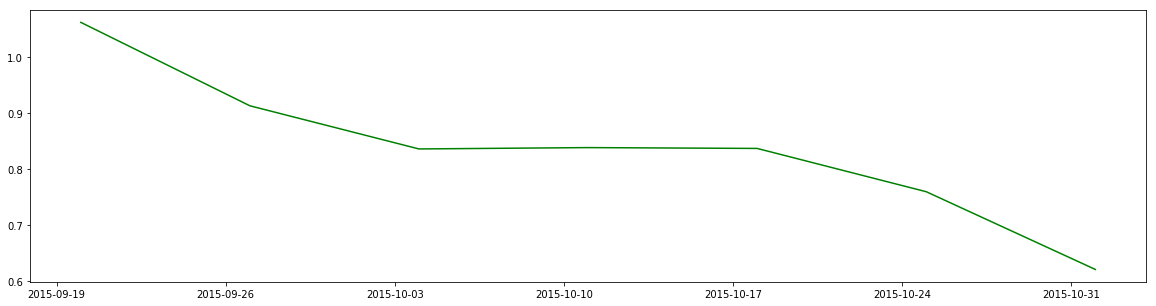

In [8]:
import matplotlib.pyplot as plt
plt.plot(weekly_summary.index, weekly_summary['Gurgaon-MCU-Power'], 'g-')
plt.show()
plt.rcParams['figure.figsize'] = 20,5

The graph shows that the power has reduced in the subsequent weeks

# Checking which week has suffered max power cuts

In [64]:
weekly_summary = weekly_summary.values.tolist()
minp = weekly_summary[0]
index = 0
for i in range(len(weekly_summary)):
    if weekly_summary[i] < minp:
        minp = weekly_summary[i]
        index = i
minp
index

6

This tells that the last week that is '2015-11-01' has suffered the max power cuts as it has the min average	

# Calculating Hourly Average

In [69]:
hourly_summary = pd.DataFrame()
hourly_summary['Gurgaon-MCU-Power'] =data['Gurgaon-MCU-Power'].resample('H').mean()
# weekly_summary['DateTime'] =data['DateTime'].resample('W').mean()
hourly_summary

,Gurgaon-MCU-Power
DateTime,
2015-09-15 00:00:00,0.846200
2015-09-15 01:00:00,1.007436
2015-09-15 02:00:00,0.959000
2015-09-15 03:00:00,0.765500
2015-09-15 04:00:00,0.651500
2015-09-15 05:00:00,0.000000
2015-09-15 06:00:00,0.424500
2015-09-15 07:00:00,1.525500
2015-09-15 08:00:00,1.148000


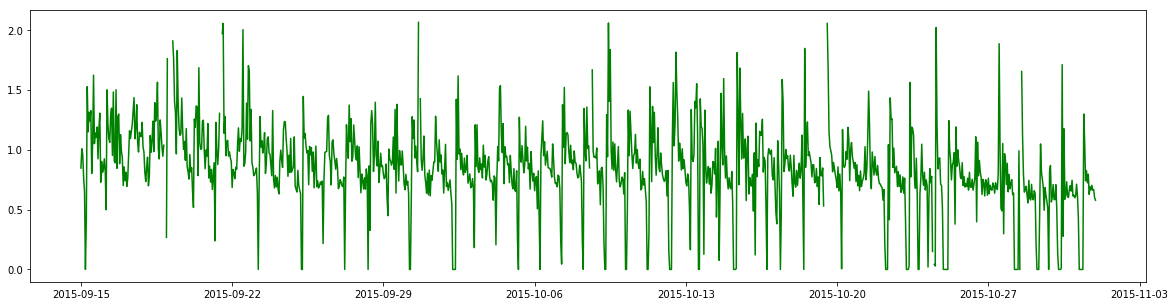

In [10]:
plt.plot(hourly_summary.index, hourly_summary['Gurgaon-MCU-Power'], 'g-')
plt.show()
plt.rcParams['figure.figsize'] = 24,5

# Calculating Daily Average

In [7]:
daily_summary = pd.DataFrame()
daily_summary['Gurgaon-MCU-Power'] = data['Gurgaon-MCU-Power'].resample('D').mean()
# weekly_summary['DateTime'] =data['DateTime'].resample('W').mean()
daily_summary

,Gurgaon-MCU-Power
DateTime,
2015-09-15,1.009964
2015-09-16,1.048319
2015-09-17,1.053632
2015-09-18,1.043215
2015-09-19,1.255382
2015-09-20,1.012886
2015-09-21,1.008785
2015-09-22,1.061516
2015-09-23,0.888501


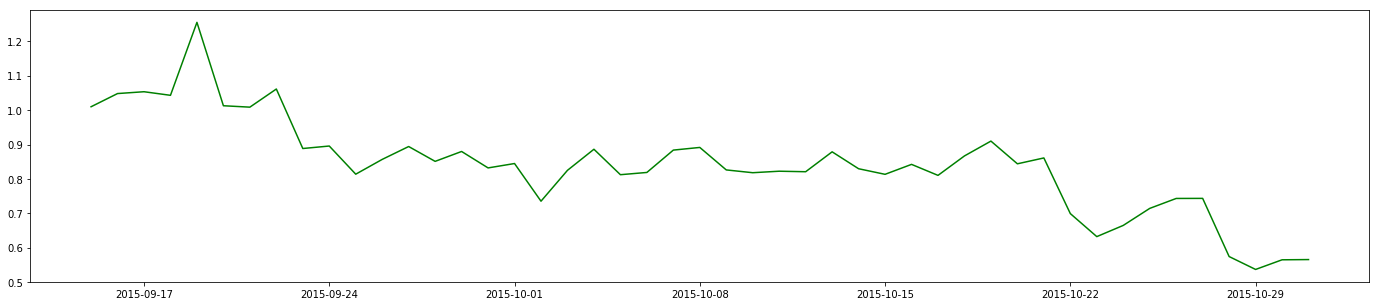

In [12]:
plt.plot(daily_summary.index, daily_summary['Gurgaon-MCU-Power'], 'g-')
plt.show()
plt.rcParams['figure.figsize'] = 20,5

The graph shows that the daily power consumption has reduced over 6 weeks.

# Calculating when the power is zero in a day and finding trends in it

In [56]:
power_0 = np.where(mcu==0)
t = list(power_0)
hour = []
for i in range(len(t[0])):
    x = data.iloc[t[0][i]]
    hour.append(pd.to_datetime(x[0]).strftime('%H'))
    
u = np.asarray(hour)
np.unique(u, return_index=True)

(array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
        '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
        '22', '23'], dtype='<U2'),
 array([5707, 5767, 5827, 5887,    0,    9,   67,  772, 1084,  620,  112,
         126, 3539,  131,  159, 2724, 3356, 3989, 4009, 4068, 3372, 3426,
        5587, 5647]))

The result shows that there is no specific trend as to when the power is zero in a day.

# Plotting Guragon Data with moving average

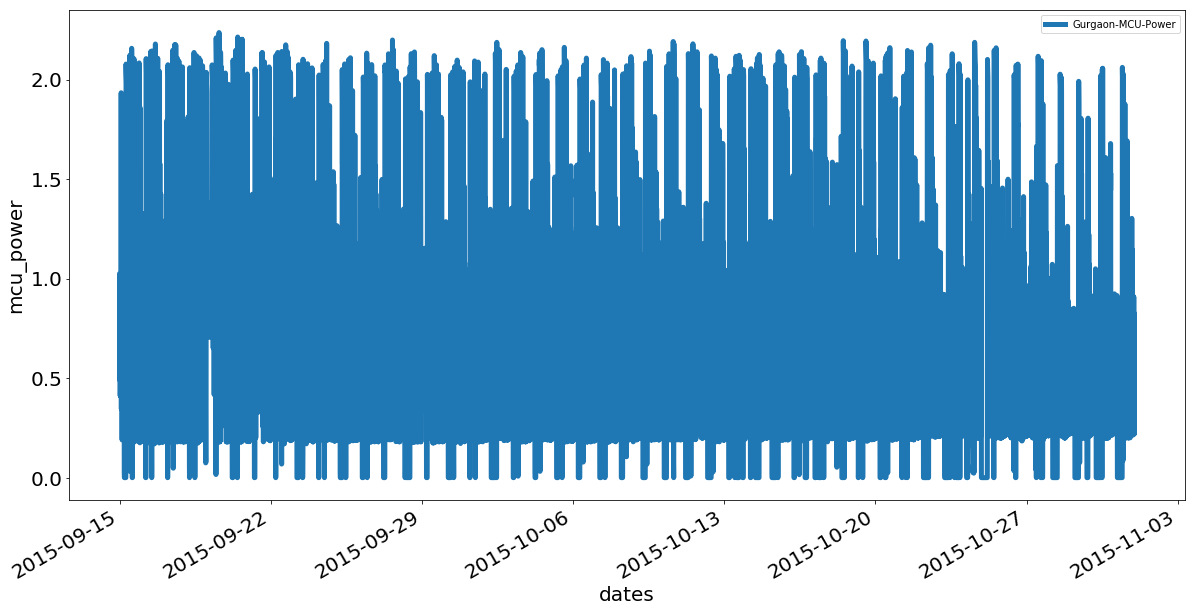

In [15]:
mcu_power = data[['Gurgaon-MCU-Power']]
mcu_power.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.ylabel('mcu_power', fontsize=20)
plt.xlabel('dates', fontsize=20);

# Auto-correlation and Partial Auto-correlation of the dataset

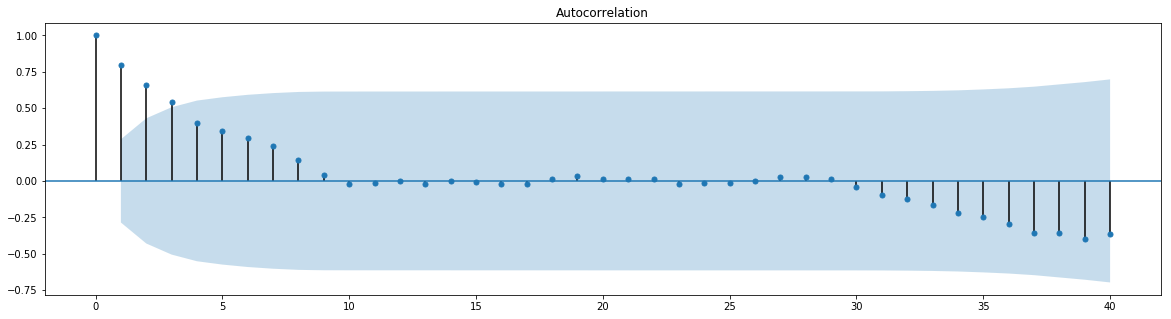

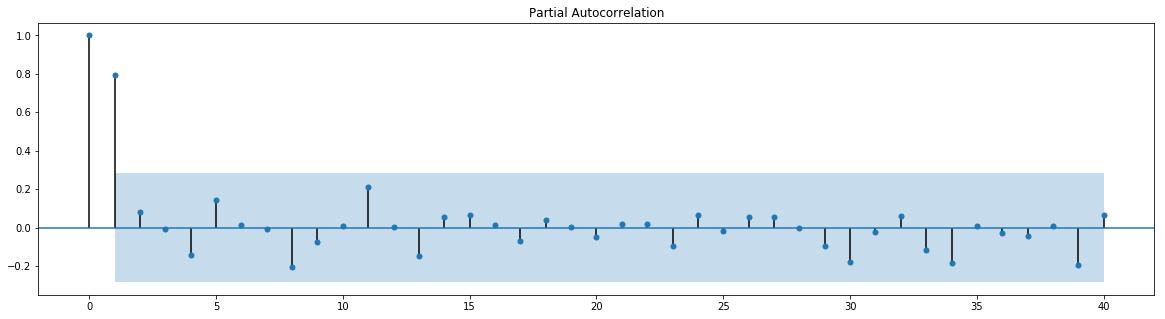

In [83]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
gurgaon_data = daily_summary.dropna()
plot_acf(gurgaon_data, ax=None, lags=40, alpha=0.05)
plt.show()
plot_pacf(gurgaon_data, ax=None, lags=40, alpha=0.05)
plt.show()

# Checking for the Stationarity of the Dataset

In [92]:
from statsmodels.tsa.stattools import adfuller
data = np.log(daily_summary).diff(1).dropna() # To make data stationary
dftest = adfuller(data['Gurgaon-MCU-Power'], autolag='AIC', regression='c')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

In [90]:
dfoutput

Test Statistic                -6.084992e+00
p-value                        1.069693e-07
Lags Used                      3.000000e+00
Number of Observations Used    4.200000e+01
Critical Value (10%)          -2.604991e+00
Critical Value (1%)           -3.596636e+00
Critical Value (5%)           -2.933297e+00
dtype: float64

As the p-value is way less than 0.05, this indicates that the dataset is stationary and forecasting can be done on it.

# Applying ARIMA Model

/home/deep/.local/lib/python3.5/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/deep/.local/lib/python3.5/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/home/deep/.local/lib/python3.5/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


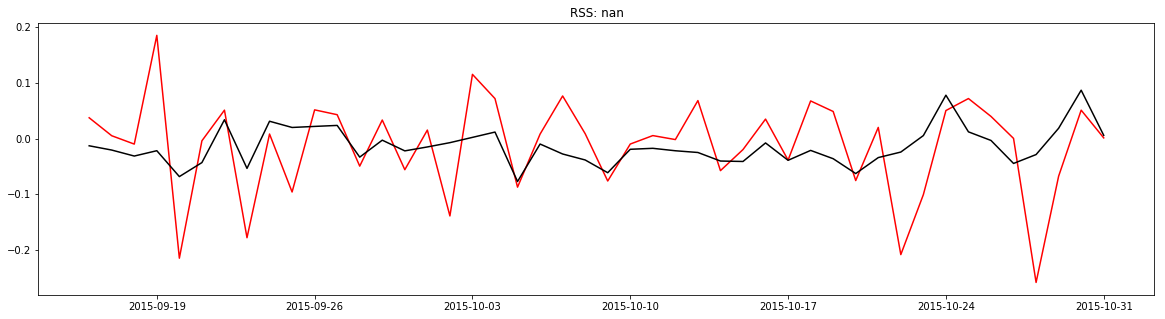

In [55]:
data1 = np.log(daily_summary).diff(1).dropna()
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data1, order=(2, 0, 2))
res = model.fit(disp=-1)
plt.plot(data1, color='red')
plt.plot(res.fittedvalues, color='black')
plt.title('RSS: {}'.format(sum(res.fittedvalues - data['Gurgaon-MCU-Power'])**2))
plt.show()

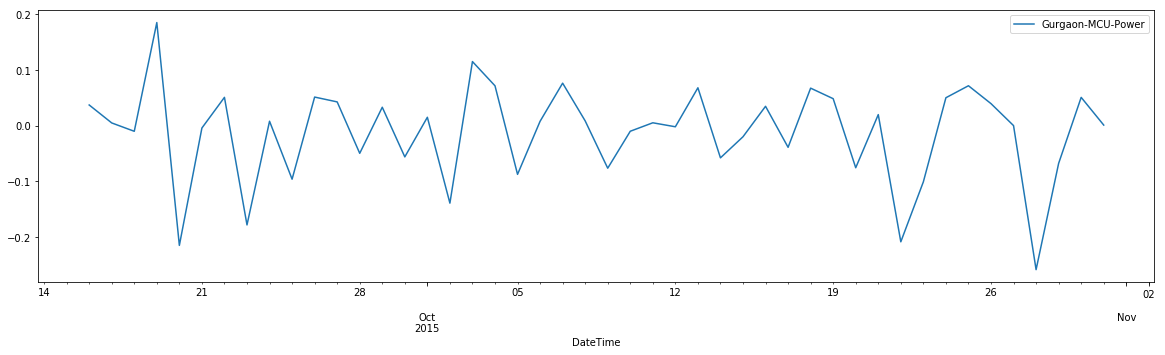

In [30]:
data = np.log(daily_summary).diff(1).dropna() # To make data stationary
data.plot()

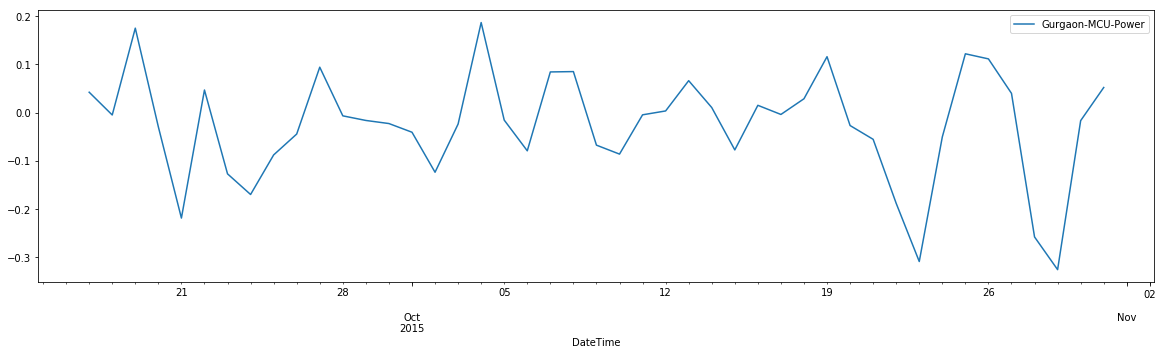

In [26]:
data = np.log(daily_summary).diff(2).dropna() # To make data stationary
data.plot()

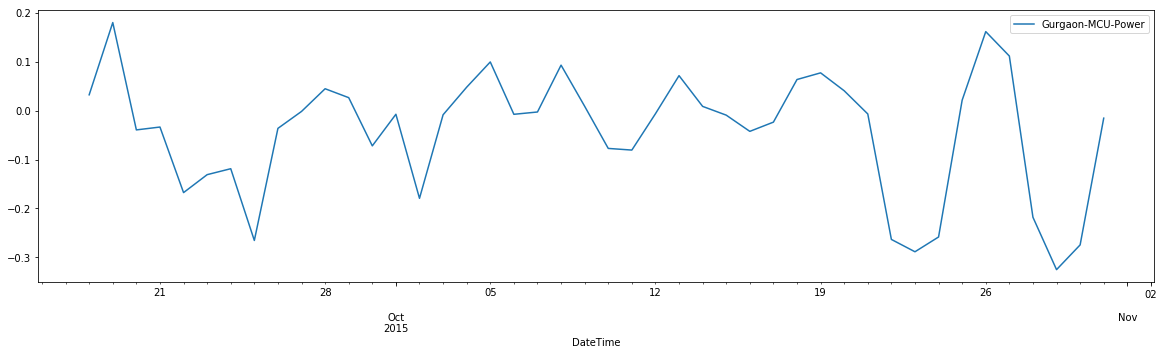

In [28]:
data = np.log(daily_summary).diff(3).dropna() # To make data stationary
data.plot()

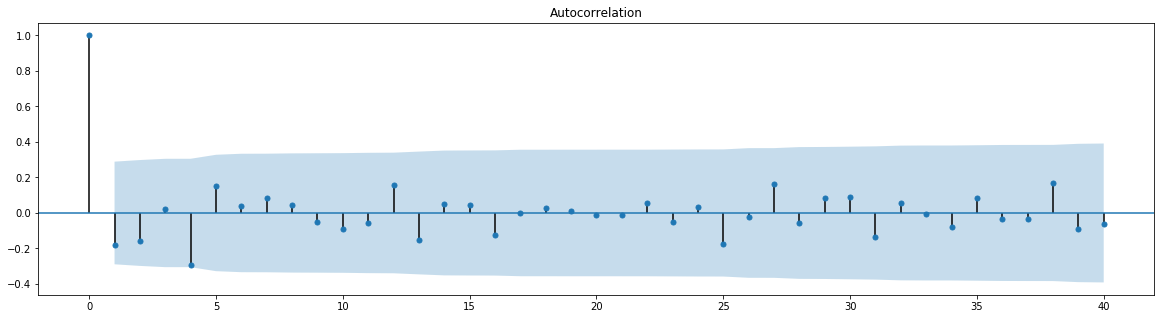

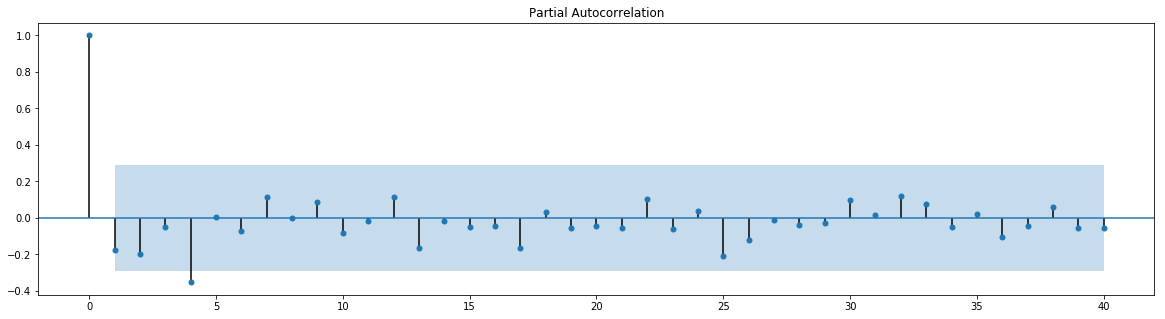

In [31]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
plot_acf(data, ax=None, lags=40, alpha=0.05)
plt.show()
plot_pacf(data, ax=None, lags=40, alpha=0.05)
plt.show()
plt.rcParams['figure.figsize'] = 20,5